<a href="https://colab.research.google.com/github/ShuHuiK/WIE3007_Data-Mining-n-Warehousing/blob/main/Data_Mining_n_Warehousing_Individual_Assig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setup Notebook Environment**

In [ ]:
# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn openai langchain -q
!pip install google-generativeai -q  # For Gemini
# Or: !pip install openai -q  # For ChatGPT API

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import json

**STEP 1 : Dataset Simulation using GenAI**

In [ ]:
def generate_synthetic_financial_data(n=500):
    """Generate synthetic financial data programmatically"""

    occupations = ['Engineer', 'Teacher', 'Doctor', 'Business Owner',
                   'Student', 'Manager', 'Nurse', 'Accountant', 'Sales', 'Consultant']

    data = []
    start_date = datetime.now() - timedelta(days=30)

    for i in range(1, n+1):
        age = random.randint(18, 70)
        income = random.randint(20000, 200000)

        # Create correlations
        if age > 50:
            income *= random.uniform(1.2, 1.5)  # Older = higher income

        occupation = random.choice(occupations)

        # Transaction patterns based on occupation
        if occupation in ['Doctor', 'Business Owner', 'Manager']:
            daily_trans = random.randint(-2000, 5000)
        else:
            daily_trans = random.randint(-500, 2000)

        # Add 5% missing values
        credit_score = random.randint(300, 850) if random.random() > 0.05 else np.nan

        # Feedback examples
        feedbacks = [
            "I plan to increase my savings next month",
            "Considering a home loan for property investment",
            "Happy with current investment returns",
            "Need to reduce credit card spending",
            "Planning to diversify investment portfolio",
            "Looking for better savings account interest rates"
        ]

        data.append({
            'Customer_ID': f'CUST_{i:03d}',
            'Age': age if random.random() > 0.05 else np.nan,  # 5% missing
            'Income': income if random.random() > 0.05 else np.nan,
            'Occupation': occupation,
            'Daily_transaction_amount': daily_trans + random.normalvariate(0, 500),  # Add noise
            'Account_balance_trend': random.choice(['Increasing', 'Decreasing', 'Stable']),
            'Investment_returns_pct': random.uniform(-10, 25),
            'Credit_score': credit_score,
            'Customer_feedback': random.choice(feedbacks),
            'Date': (start_date + timedelta(days=random.randint(0, 30))).strftime('%Y-%m-%d')
        })

    df = pd.DataFrame(data)

    # Add some outliers (noisy data)
    outlier_indices = random.sample(range(n), n//20)  # 5% outliers
    for idx in outlier_indices:
        df.loc[idx, 'Daily_transaction_amount'] *= random.choice([5, -5])

    return df

# Generate data
df = generate_synthetic_financial_data(500)
df.to_csv('financial_data.csv', index=False)
print("Data saved to financial_data.csv")

Data saved to financial_data.csv


In [ ]:
print(df.head())

  Customer_ID   Age         Income      Occupation  Daily_transaction_amount  \
0    CUST_001  39.0   20057.000000      Accountant                 94.119976   
1    CUST_002  67.0   41361.792136      Consultant                357.509340   
2    CUST_003  21.0   63348.000000           Nurse               1781.134183   
3    CUST_004  61.0  114934.475851         Teacher                273.971957   
4    CUST_005  43.0   29841.000000  Business Owner              -9004.429261   

  Account_balance_trend  Investment_returns_pct  Credit_score  \
0                Stable               14.077251         601.0   
1            Decreasing               -0.626089         739.0   
2                Stable               18.403748         332.0   
3            Increasing               -3.758875         644.0   
4                Stable               -5.798869         722.0   

                                   Customer_feedback        Date  
0              Happy with current investment returns  2025-11

**STEP 2 : Exploratory Data Analysis (EDA) with LLM insights**

=== BASIC STATISTICS ===
              Age         Income  Daily_transaction_amount  \
count  483.000000     475.000000                500.000000   
mean    44.498965  120897.888887                991.945398   
std     15.112219   63178.909909               1966.933493   
min     18.000000   20057.000000             -10554.314300   
25%     32.000000   68154.500000                -35.513379   
50%     45.000000  116483.000000                819.269706   
75%     57.500000  167126.813748               1740.293258   
max     70.000000  289857.421124              16934.084873   

       Investment_returns_pct  Credit_score  
count              500.000000    475.000000  
mean                 7.999874    587.627368  
std                  9.897087    162.082251  
min                 -9.582983    300.000000  
25%                 -0.673053    464.000000  
50%                  8.410131    589.000000  
75%                 16.476320    729.000000  
max                 24.953923    850.000000  

M

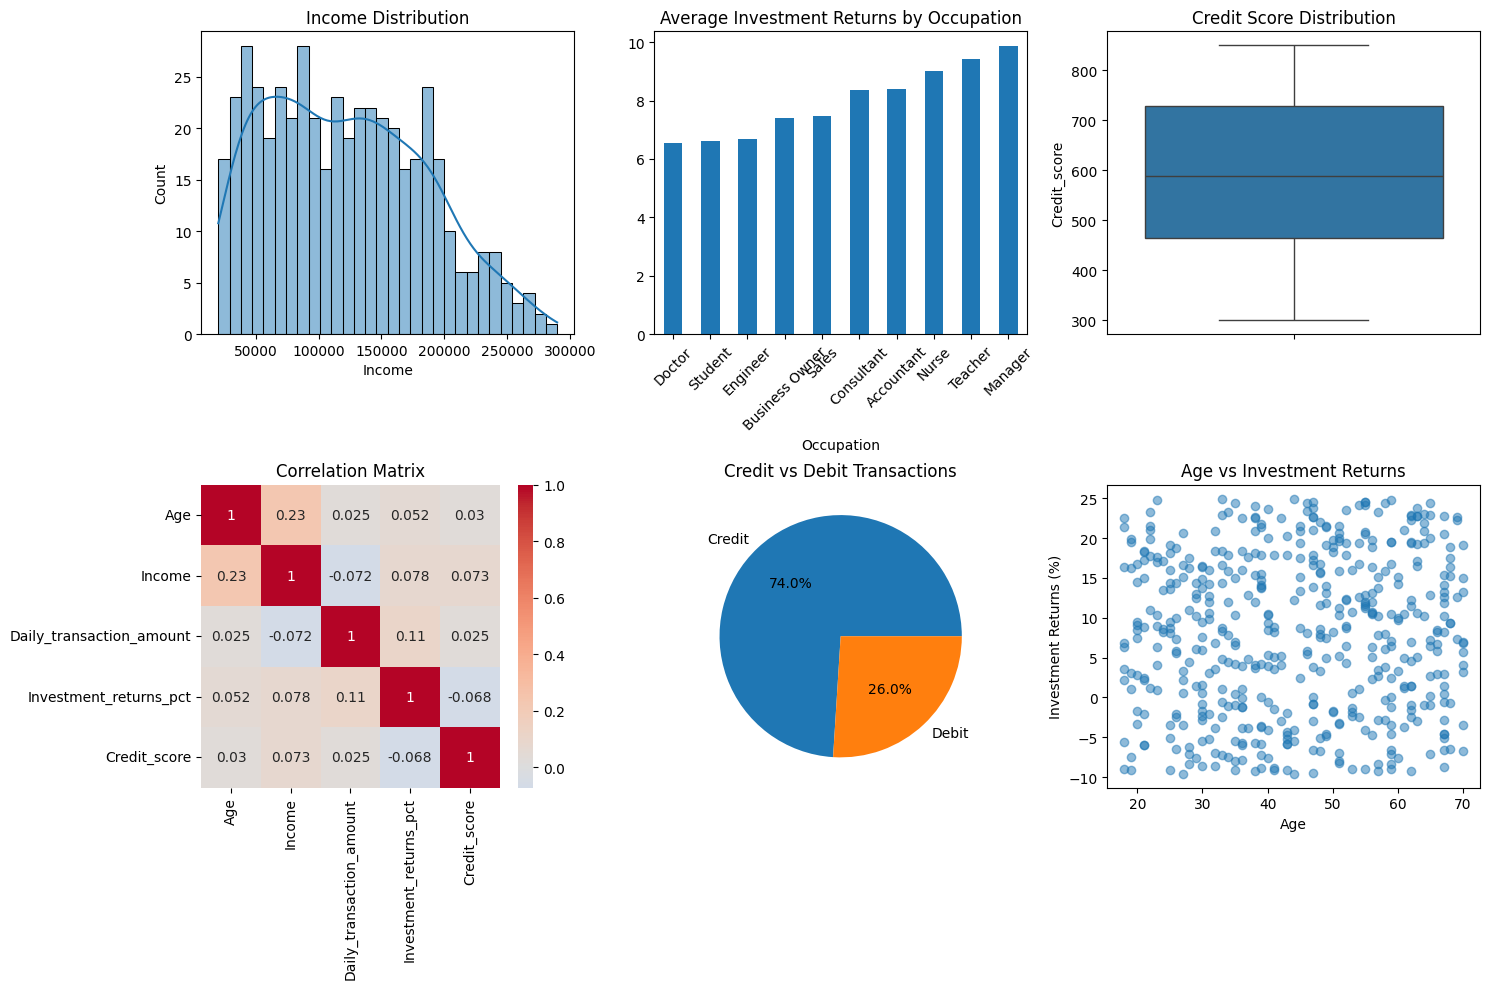


=== ANOMALY DETECTION ===
Found 27 outliers in transaction amounts

=== AI-GENERATED INSIGHTS ===
Based on the financial data analysis, here are the key business insights and recommendations:

### 1. Customer Segmentation Opportunities

The wide distribution in Income and Credit Score reveals at least two distinct customer segments that require different strategies.

*   **High-Value Clients:** The top 25% of customers have incomes over **$167,000** and credit scores above **729**. These are prime candidates for premium services.
    *   **Action:** Target this group with wealth management, personalized investment advisory, and exclusive credit products (e.g., premium credit cards, preferential loan rates).
*   **Credit-Builder Segment:** The bottom 25% have incomes below **$68,000** and credit scores under **464**. This group represents a long-term growth opportunity.
    *   **Action:** Offer financial literacy programs, secured credit cards, and small personal loans to help them bu

In [ ]:
# EDA Part 1: Basic Statistics
print("=== BASIC STATISTICS ===")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# EDA Part 2: Visualizations
plt.figure(figsize=(15, 10))

# 1. Distribution of Income
plt.subplot(2, 3, 1)
sns.histplot(df['Income'].dropna(), kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')

# 2. Investment Returns by Occupation
plt.subplot(2, 3, 2)
occupation_returns = df.groupby('Occupation')['Investment_returns_pct'].mean().sort_values()
occupation_returns.plot(kind='bar')
plt.title('Average Investment Returns by Occupation')
plt.xticks(rotation=45)

# 3. Credit Score Distribution
plt.subplot(2, 3, 3)
sns.boxplot(y=df['Credit_score'])
plt.title('Credit Score Distribution')

# 4. Correlation Heatmap
plt.subplot(2, 3, 4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# 5. Transaction Amount Trends
plt.subplot(2, 3, 5)
df['Transaction_Type'] = df['Daily_transaction_amount'].apply(
    lambda x: 'Credit' if x > 0 else 'Debit')
transaction_counts = df['Transaction_Type'].value_counts()
plt.pie(transaction_counts.values, labels=transaction_counts.index, autopct='%1.1f%%')
plt.title('Credit vs Debit Transactions')

# 6. Age vs Investment Returns Scatter
plt.subplot(2, 3, 6)
plt.scatter(df['Age'], df['Investment_returns_pct'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Investment Returns (%)')
plt.title('Age vs Investment Returns')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# EDA Part 3: Anomaly Detection
print("\n=== ANOMALY DETECTION ===")
Q1 = df['Daily_transaction_amount'].quantile(0.25)
Q3 = df['Daily_transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Daily_transaction_amount'] < (Q1 - 1.5 * IQR)) |
              (df['Daily_transaction_amount'] > (Q3 + 1.5 * IQR))]
print(f"Found {len(outliers)} outliers in transaction amounts")

# EDA Part 4: LLM Insights (Using Gemini)
def get_llm_insights(summary_stats, visualizations_description):
    """Get AI interpretation of EDA results"""

    prompt = f"""
    Analyze these financial data insights and provide business recommendations:

    Data Summary:
    {summary_stats}

    Key Findings:
    1. Income distribution shows {df['Income'].mean():.0f} average with {df['Income'].std():.0f} standard deviation
    2. Investment returns average: {df['Investment_returns_pct'].mean():.2f}%
    3. Credit score average: {df['Credit_score'].mean():.0f}
    4. Correlation between Income and Investment Returns: {df['Income'].corr(df['Investment_returns_pct']):.2f}
    5. Found {len(outliers)} outlier transactions

    Provide insights in these areas:
    1. Customer segmentation opportunities
    2. Risk factors identified
    3. Investment pattern insights
    4. Recommendations for the bank

    Keep response concise and business-focused.
    """

    model = genai.GenerativeModel('gemini-pro-latest')
    response = model.generate_content(prompt)
    return response.text

# Generate summary statistics
summary_stats = df.describe().to_string()
insights = get_llm_insights(summary_stats, "Visualizations created: distributions, correlations, anomalies")
print("\n=== AI-GENERATED INSIGHTS ===")
print(insights)

# Save insights
with open('ai_insights.txt', 'w') as f:
    f.write(insights)

**STEP 3 :  Data Preprocessing using LLM / SLMs**

In [ ]:
# Preprocessing Part 1: Handle Missing Values
print("=== HANDLING MISSING VALUES ===")

# Strategy 1: Impute numerical values with median
for col in ['Age', 'Income', 'Credit_score']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Imputed {col} with median: {median_val}")

# Strategy 2: For categorical, use mode
if df['Occupation'].isnull().any():
    mode_val = df['Occupation'].mode()[0]
    df['Occupation'] = df['Occupation'].fillna(mode_val)

print(f"Missing values after imputation: {df.isnull().sum().sum()}")

# Preprocessing Part 2: Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df[['Age_normalized', 'Income_normalized', 'Credit_score_normalized']] = scaler.fit_transform(
    df[['Age', 'Income', 'Credit_score']])

# Preprocessing Part 3: Encode Categorical Variables
df = pd.get_dummies(df, columns=['Occupation', 'Account_balance_trend'], prefix=['Occ', 'Trend'])

# Preprocessing Part 4: Text Processing with LLM
def classify_feedback_with_ai(feedback_text):
    """Use LLM to classify customer feedback"""

    prompt = f"""
    Classify this banking customer feedback into one of these categories:
    - Positive
    - Neutral
    - Negative
    - Savings-related
    - Loan-related
    - Investment-related

    Feedback: "{feedback_text}"

    Return ONLY the category name.
    """

    model = genai.GenerativeModel('gemini-pro')
    response = model.generate_content(prompt)
    return response.text.strip()

# Apply to first 50 feedbacks (to save API calls)
print("\n=== TEXT CLASSIFICATION WITH AI ===")
sample_feedbacks = df['Customer_feedback'].head(50).tolist()
classified = []

for feedback in sample_feedbacks:
    try:
        category = classify_feedback_with_ai(feedback)
        classified.append(category)
    except:
        classified.append('Neutral')  # Fallback

df['Feedback_Category'] = 'Neutral'  # Default
df.loc[:49, 'Feedback_Category'] = classified

print("Feedback categories distribution:")
print(df['Feedback_Category'].value_counts())

# Alternative: Rule-based classification (if API limited)
def classify_feedback_rule_based(text):
    """Rule-based fallback for text classification"""
    text_lower = text.lower()

    if any(word in text_lower for word in ['happy', 'good', 'excellent', 'satisfied']):
        return 'Positive'
    elif any(word in text_lower for word in ['loan', 'mortgage', 'borrow']):
        return 'Loan-related'
    elif any(word in text_lower for word in ['savings', 'save', 'deposit']):
        return 'Savings-related'
    elif any(word in text_lower for word in ['investment', 'portfolio', 'returns']):
        return 'Investment-related'
    elif any(word in text_lower for word in ['problem', 'issue', 'complaint']):
        return 'Negative'
    else:
        return 'Neutral'

# Apply rule-based to all
df['Feedback_Category_Rule'] = df['Customer_feedback'].apply(classify_feedback_rule_based)

# Save preprocessed data
df.to_csv('preprocessed_financial_data.csv', index=False)
print("\nPreprocessed data saved to preprocessed_financial_data.csv")

=== HANDLING MISSING VALUES ===
Imputed Age with median: 45.0
Imputed Income with median: 116483.0
Imputed Credit_score with median: 589.0
Missing values after imputation: 0

=== TEXT CLASSIFICATION WITH AI ===


Feedback categories distribution:
Feedback_Category
Neutral    500
Name: count, dtype: int64

Preprocessed data saved to preprocessed_financial_data.csv
